In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#retail = pd.read_csv('Online+Retail.csv', sep=',', encoding='ISO-8859-1')
#retail['InvoiceDate'] = retail['InvoiceDate'].str.replace('/', '-')
#retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'], format = '%d-%m-%Y %H:%M')
#retail.head()

cricket = pd.read_csv('Cricket.csv', sep=',', encoding='ISO-8859-1')
cricket.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [2]:
cricket = cricket[['Player', 'Ave', 'SR']]

In [3]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

cric_analysis = cricket[['Ave', 'SR']]
cric_analysis = std_scaler.fit_transform(cric_analysis)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


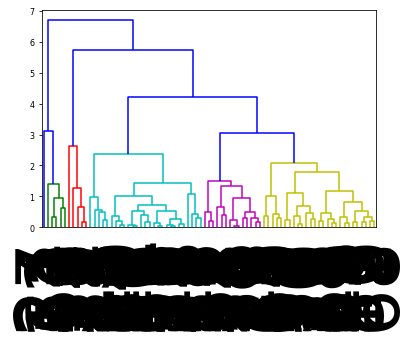

In [14]:
mergings = linkage(cric_analysis, method='complete', metric='euclidean')

fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(1, 1, 1)
ax = plt.gca()


dendrogram(mergings, color_threshold=3)

ax.tick_params(axis='x', which='major', labelsize=75)
ax.tick_params(axis='y', which='major', labelsize=8)

plt.show()
fig.savefig("asdf.png")

In [26]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
cric_analysis_hc = pd.concat([cricket[['Player', 'Ave', 'SR']], pd.DataFrame(clusterCut)], axis=1)
cric_analysis_hc.columns = ['Player', 'Ave', 'SR', 'ClusterID']

In [27]:
cric_analysis_hc[cric_analysis_hc['ClusterID']==0]

,Player,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),44.83,86.23,0
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,0
2,RT Ponting (AUS/ICC),42.03,80.39,0
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,0
9,BC Lara (ICC/WI),40.48,79.51,0
10,TM Dilshan (SL),39.27,86.23,0
11,Mohammad Yousuf (Asia/PAK),41.71,75.10,0


In [28]:
cric_analysis_hc[cric_analysis_hc['ClusterID']==1]

,Player,Ave,SR,ClusterID
3,ST Jayasuriya (Asia/SL),32.36,91.20,1
12,AC Gilchrist (AUS/ICC),35.89,96.94,1
24,V Sehwag (Asia/ICC/INDIA),35.05,104.33,1
27,Shahid Afridi (Asia/ICC/PAK),23.57,117.00,1
50,BB McCullum (NZ),30.41,96.37,1
61,SK Raina (INDIA),35.46,93.76,1


In [29]:
cric_analysis_hc[cric_analysis_hc['ClusterID']==2]

,Player,Ave,SR,ClusterID
4,DPMD Jayawardene (Asia/SL),33.37,78.96,2
14,M Azharuddin (INDIA),36.92,74.02,2
16,PA de Silva (SL),34.90,81.13,2
28,SP Fleming (ICC/NZ),32.40,71.49,2
30,SR Waugh (AUS),32.90,75.91,2
31,A Ranatunga (SL),35.84,77.90,2
33,Younis Khan (PAK),31.24,75.29,2
35,Saleem Malik (PAK),32.88,76.41,2
36,NJ Astle (NZ),34.92,72.64,2
40,A Flower (ZIM),35.34,74.59,2


In [30]:
cric_analysis_hc[cric_analysis_hc['ClusterID']==3]

,Player,Ave,SR,ClusterID
13,MS Dhoni (Asia/INDIA),51.32,88.69,3
15,AB de Villiers (Afr/SA),53.55,100.25,3
25,V Kohli (INDIA),53.94,90.99,3
34,HM Amla (SA),50.25,89.05,3
38,MG Bevan (AUS),53.58,74.16,3


In [94]:
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(cric_analysis)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [95]:
model_clus4.labels_

array([3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 3, 1, 3, 1, 2, 0, 0, 2, 0,
       1, 0, 2, 3, 1, 2, 1, 0, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0, 1, 1, 3, 1,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 1])

In [96]:
cricket.index = pd.RangeIndex(len(cricket.index))
cricket_km = pd.concat([cricket, pd.Series(model_clus4.labels_)], axis=1)

In [97]:
cricket_km.columns = ['Players', 'Ave', 'SR', 'ClusterID']

In [98]:
cricket_km[cricket_km['Players'].str.contains('Kohli')]

,Players,Ave,SR,ClusterID
25,V Kohli (INDIA),53.94,90.99,3


In [101]:
cricket_km[cricket_km['ClusterID']==0]

,Players,Ave,SR,ClusterID
1,KC Sangakkara (Asia/ICC/SL),41.98,78.86,0
2,RT Ponting (AUS/ICC),42.03,80.39,0
5,Inzamam-ul-Haq (Asia/PAK),39.52,74.24,0
6,JH Kallis (Afr/ICC/SA),44.36,72.89,0
7,SC Ganguly (Asia/INDIA),41.02,73.70,0
8,R Dravid (Asia/ICC/INDIA),39.16,71.24,0
9,BC Lara (ICC/WI),40.48,79.51,0
11,Mohammad Yousuf (Asia/PAK),41.71,75.10,0
18,Saeed Anwar (PAK),39.21,80.67,0
19,S Chanderpaul (WI),41.60,70.74,0


In [102]:
cricket_km[cricket_km['ClusterID']==1]

,Players,Ave,SR,ClusterID
4,DPMD Jayawardene (Asia/SL),33.37,78.96,1
14,M Azharuddin (INDIA),36.92,74.02,1
16,PA de Silva (SL),34.90,81.13,1
22,MS Atapattu (SL),37.57,67.72,1
26,HH Gibbs (SA),36.13,83.26,1
28,SP Fleming (ICC/NZ),32.40,71.49,1
30,SR Waugh (AUS),32.90,75.91,1
31,A Ranatunga (SL),35.84,77.90,1
33,Younis Khan (PAK),31.24,75.29,1
35,Saleem Malik (PAK),32.88,76.41,1


In [103]:
cricket_km[cricket_km['ClusterID']==2]

,Players,Ave,SR,ClusterID
3,ST Jayasuriya (Asia/SL),32.36,91.20,2
10,TM Dilshan (SL),39.27,86.23,2
12,AC Gilchrist (AUS/ICC),35.89,96.94,2
17,CH Gayle (ICC/WI),37.33,85.11,2
20,Yuvraj Singh (Asia/INDIA),36.55,87.67,2
24,V Sehwag (Asia/ICC/INDIA),35.05,104.33,2
27,Shahid Afridi (Asia/ICC/PAK),23.57,117.00,2
50,BB McCullum (NZ),30.41,96.37,2
57,EJG Morgan (ENG/IRE),38.73,88.62,2
59,SR Watson (AUS),40.54,90.44,2


In [112]:
cricket_km[cricket_km['ClusterID']==3]

,Players,Ave,SR,ClusterID
0,SR Tendulkar (INDIA),44.83,86.23,3
13,MS Dhoni (Asia/INDIA),51.32,88.69,3
15,AB de Villiers (Afr/SA),53.55,100.25,3
25,V Kohli (INDIA),53.94,90.99,3
34,HM Amla (SA),50.25,89.05,3
38,MG Bevan (AUS),53.58,74.16,3
42,IVA Richards (WI),47.00,90.20,3
63,MJ Guptill (NZ),43.30,87.73,3
64,MEK Hussey (AUS),48.15,87.16,3


3
in 3
0
in 0
0
in 0
2
in 2
1
in 1
0
in 0
0
in 0
0
in 0
0
in 0
0
in 0
2
in 2
0
in 0
2
in 2
3
in 3
1
in 1
3
in 3
1
in 1
2
in 2
0
in 0
0
in 0
2
in 2
0
in 0
1
in 1
0
in 0
2
in 2
3
in 3
1
in 1
2
in 2
1
in 1
0
in 0
1
in 1
1
in 1
0
in 0
1
in 1
3
in 3
1
in 1
1
in 1
0
in 0


C:\Users\e050078\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\e050078\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\e050078\AppDa

3
in 3
0
in 0
1
in 1
1
in 1
3
in 3
1
in 1
1
in 1
1
in 1
0
in 0
1
in 1
1
in 1
0
in 0
2
in 2
0
in 0
1
in 1
1
in 1
1
in 1
1
in 1
0
in 0
2
in 2
1
in 1
2
in 2
1
in 1
2
in 2
0
in 0
3
in 3
3
in 3
0
in 0
0
in 0
1
in 1
0
in 0
1
in 1
0
in 0
1
in 1
1
in 1
1
in 1
0
in 0
0
in 0


C:\Users\e050078\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\e050078\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\e050078\AppDa

1
in 1
2
in 2
1
in 1


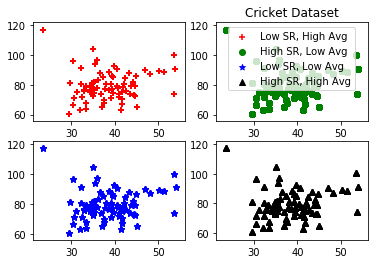

In [122]:
import pylab as pl

for i in range(0, cricket_km.shape[0]):
    print(cricket_km.ClusterID[i])
    if cricket_km.ClusterID[i] == 0:
        print('in 0')
        pl.subplot(221)
        c1 = pl.scatter(cricket_km['Ave'], cricket_km['SR'], c='r', marker='+')
    elif cricket_km.ClusterID[i] == 1:
        print('in 1')
        pl.subplot(222)
        c2 = pl.scatter(cricket_km['Ave'], cricket_km['SR'], c='g', marker='o')
    elif cricket_km.ClusterID[i] == 2:
        print('in 2')
        pl.subplot(223)
        c3 = pl.scatter(cricket_km['Ave'], cricket_km['SR'], c='b', marker='*')
    elif cricket_km.ClusterID[i] == 3:
        print('in 3')
        pl.subplot(224)
        c4 = pl.scatter(cricket_km['Ave'], cricket_km['SR'], c='k', marker='^')
        
#pl.scatter(cricket_km[:,1], cricket_km[:,2], c='g', marker='o')
pl.legend([c1, c2, c3, c4], ['Low SR, High Avg', 'High SR, Low Avg', 'Low SR, Low Avg', 'High SR, High Avg'])
pl.title('Cricket Dataset')
pl.show()